# Yaorui Guo (yg2815)

# Lab #3

In [1]:
# Some preliminary set up code:
from __future__ import division
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
os.chdir('/Users/gyr/Desktop/5019_Python/dataset')

g = pd.read_csv("GSS.2006.csv")
g.head()

,vpsu,vstrat,adults,ballot,dateintv,famgen,form,formwt,gender1,hompop,...,away7,gender14,old14,relate14,relhh14,relhhd14,relsp14,where12,where6,where7
0,1,1957,1,3,316,2,1,1,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1957,2,2,630,1,2,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1957,2,2,314,2,1,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1957,1,1,313,1,2,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1957,3,1,322,2,2,1,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1. Run a simple bivariate regression, and interpret your results. (Did the results fit your expectations? Why? Why not?)

## I would like to know if people's work status affects their mental health. Therefore, I chose the question of whether people's lack of respect at work can cause a deterioration in their mental health.

## The variable '*mntlhlth*' represents the number of days in a month with bad health from 1 to 30, the larger the value the more days with bad health.

## The variable '*respect*' from 1 to 4 represent the lack of respect, the higher the value the less respect is felt. 

- 458) Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (mntlhlth)

- 412) At the place where I work, I am treated with respect. (respect)

In [3]:
# pd.crosstab(g.mntlhlth,g.respect)

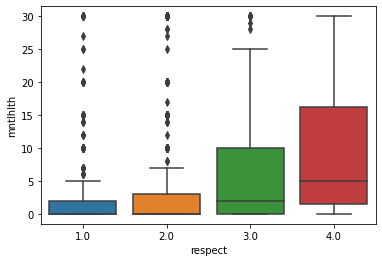

In [4]:
sns.boxplot(x="respect", y="mntlhlth",data=g)
plt.show()

## From the boxplot, we can see that the not feeling respect at work is stronger, and the number of days of bad mental health is increasing

In [5]:
lm1 = smf.ols(formula = 'mntlhlth~respect', data = g).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:               mntlhlth   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     77.85
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           2.69e-18
Time:                        11:31:41   Log-Likelihood:                -5593.7
No. Observations:                1703   AIC:                         1.119e+04
Df Residuals:                    1701   BIC:                         1.120e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4988      0.423     -1.178      0.2

## The regression results show that the number of days a person has bad mental health increases by nearly 2 points for feelings of disrespect at work. 

## This result met my expectations because I know that workplace bullying is a big problem at work. In China, there is a very significant hierarchical structure in the workplace that leads to employees having to comply with any requests made by their superiors, which can lead to serious mental illness in many employees in the long run.

# 2. Add an additional variable that might mediate or partly "explain" the initial association from that simple regression above -- and explain your results. Did it work out? Yes? No?

## Another problem at work is workload, and I wonder if this also affects people's mental health

## The variable '*overwork*'  is described as having too much work that interferes with other things, which I tend to interpret as workload or extra work (overtime). It is from 1 to 4 represent the amount of work, the higher the value the smaller the workload.
- 409) I have too much work to do everything well. (overwork)

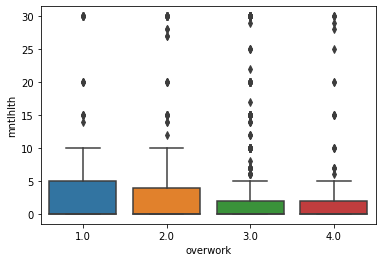

In [6]:
sns.boxplot(x="overwork", y="mntlhlth",data=g)
plt.show()

## The boxplot shows that as the workload decreases the number of days of mental ill health can be reduced.

In [7]:
# add new varibale to original regresson model
lm2 = smf.ols(formula = 'mntlhlth~respect+overwork', data = g).fit()
print (lm2.summary())

                            OLS Regression Results                            
Dep. Variable:               mntlhlth   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     44.91
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           9.89e-20
Time:                        11:31:41   Log-Likelihood:                -5562.3
No. Observations:                1697   AIC:                         1.113e+04
Df Residuals:                    1694   BIC:                         1.115e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5320      0.773      1.982      0.0

## The regression results illustrate that controlling for level of respect, the number of days with bad mental health decreases by 0.7 points, on average, as the workload decreases.

## From the results, the variable 'overwork' does mediate the variable 'mntlhlth' even though the coefficient is not as large as another variable'respect'.

## As I expected, a large part of people's mental health problems come from work, and workload at work is a serious social problem. The increasing workload of young people and the increasing amount of overtime work has led to serious mental health problems in modern times. I think this problem will be more obvious and acute if we use the recent dataset.

# 3. Run another multiple regression. Tell me how you expect your dependent variable to be affected by the independent variables. Interpret your results.


## I would like to know what is the standard of happiness of Chinese people, in other words whether people feel happy because of good health, family harmony, and as they grow older.

In [8]:
d = pd.read_csv("WVS.csv")
d.head()

,V1,V2,V2A,V3,V4,V5,V6,V7,V8,V9,...,V224_ESMA,V228_2,V243_AU,V244_AU,V248_CS,V253_CS,V256B,V256C,sacsecval,secvalwgt
0,6,12,12,1.0,1.0,1.0,1.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300476,1.0
1,6,12,12,2.0,1.0,2.0,3.0,4.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.301905,1.0
2,6,12,12,3.0,1.0,3.0,2.0,4.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.386071,1.0
3,6,12,12,4.0,1.0,1.0,3.0,4.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.344405,1.0
4,6,12,12,5.0,1.0,1.0,1.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.304167,1.0


In [35]:
d.rename(columns={'V10':'happiness',# Feeling of happiness
                  'V102':'fam_trust',# How much you trust: Your family
                  'V11':'health', # State of health 
                  'V58':'child',# How many children do you have
                  'V242':'age',
                  'V55':'freedom' #How much freedom of choice and control
                 }, 
                 inplace=True)

In [10]:
# for col in d.columns: 
#     print(col)

In [11]:
# chccek for values range of each variable
# pd.crosstab(d.happiness,d.fam_trust)

### I reverse code these independent variables and the dependent variables to make the interpretion easily and clearly.

In [36]:
d['rhappiness']=5-(d['happiness']) 
## reverse code happiness variable - higher variable means more happy ... ##

In [37]:
d['rhealth']=5-(d['health']) 
## reverse code health variable - higher variable means more healthy ... ##

In [38]:
d['rfam_trust']=5-(d['fam_trust']) 
## reverse code fam_trust variable - higher variable means more trust on family ... ##

## I am going to focus only on China, which is country code (V2) of 156.

In [15]:
lm1 = smf.ols(formula = 'rhappiness ~ rfam_trust + rhealth + age', data = d, subset = (d['V2']==156) ).fit()
print (lm1.summary())

                            OLS Regression Results                            
Dep. Variable:             rhappiness   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     125.5
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           6.74e-75
Time:                        11:31:44   Log-Likelihood:                -1730.7
No. Observations:                2153   AIC:                             3469.
Df Residuals:                    2149   BIC:                             3492.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6322      0.151     10.808      0.0

## This is a multiple regression predicting happiness of people as a degree of health status, trust on family, and age.

## Results show that these things matter, in predictable ways as I thnik, more trust on family and better healthy status tend to feel more happy in China, but the small factor of age hardly affects the happiness.

## This result is very much in line with the traditional Chinese values of good health and family harmony, but I think these expectations should apply to all people because they are some of the most basic criteria in life.

# 4. Now add another independent variable to that model in Question 3, specifically a set of dummy variables. Tell me why you added that new set of variables and what effect you expected them to have. Did they have an effect? Interpret that new model. 

## Next I wonder if people's happiness increases with greater freedom of choice. But I think too much freedom of choice will lead to a decrease in happiness, and I speculate that happiness will rise and then fall as the freedom of choice increases

## The variable 'freedom' represents how much freedom of choice and control is represented, ranging from 1 to 10, with larger values representing more freedom of choice.

In [40]:
pd.crosstab(d.rhappiness,d.freedom)

freedom,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
rhappiness,,,,,,,,,,
1.0,252,121,168,153,283,222,240,221,122,258
2.0,416,322,641,778,1598,1161,1240,1209,610,1123
3.0,552,416,952,1495,5045,5075,7074,7694,3706,5419
4.0,375,187,377,517,2017,2213,3518,4891,3212,6268


In [41]:
# Check the number of missing value #
d.freedom.isnull().sum()

1300

In [44]:
dd = d.dropna(subset = ["freedom"])

## The variable 'freedom' has 10 (ordered) categories, and I made dummies of freedom_1 through freedom_10

In [45]:
ddsub = pd.concat([dd.rhappiness, dd.rfam_trust, dd.rhealth, dd.age, dd.V2,
                   pd.get_dummies(dd.freedom.astype(int), prefix='freedom')],  axis = 1 )
ddsub.columns

Index(['rhappiness', 'rfam_trust', 'rhealth', 'age', 'V2', 'freedom_1',
       'freedom_2', 'freedom_3', 'freedom_4', 'freedom_5', 'freedom_6',
       'freedom_7', 'freedom_8', 'freedom_9', 'freedom_10'],
      dtype='object')

In [46]:
lm2 = smf.ols(formula = 'rhappiness ~ rfam_trust + rhealth + age  + freedom_1 + freedom_2 + freedom_3 \
                        + freedom_4 + freedom_5 + freedom_6 + freedom_7 + freedom_8 + freedom_9 + freedom_10',
                        data = ddsub, subset = (ddsub['V2']==156) ).fit()
print (lm2.summary())

                            OLS Regression Results                            
Dep. Variable:             rhappiness   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     46.66
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           9.11e-99
Time:                        12:18:35   Log-Likelihood:                -1613.2
No. Observations:                2098   AIC:                             3252.
Df Residuals:                    2085   BIC:                             3326.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6141      0.137     11.778      0.0

## The results show that as the freedom of choice category rises, higher scores respond in people's happiness. However, for freedom levels of 3 and 4, the p-value is much greater than 0.05, which is not statistically significant for the happiness.

## This result still surprises me, the more freedom of choice can make people feel happier. It is also possible that my understanding of this variable is biased, perhaps not just the degree of freedom alone but one that includes both freedom and control. In this case it is possible that a higher level means that people are completely free to control their choices and therefore have a higher level of happiness.